In [28]:
import time
import cv2
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 14]

In [29]:
def show(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [30]:
with open('coco.names', 'r') as f:
    coco_names = f.readlines()

class_names = [name.rstrip() for name in coco_names]
print(class_names)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


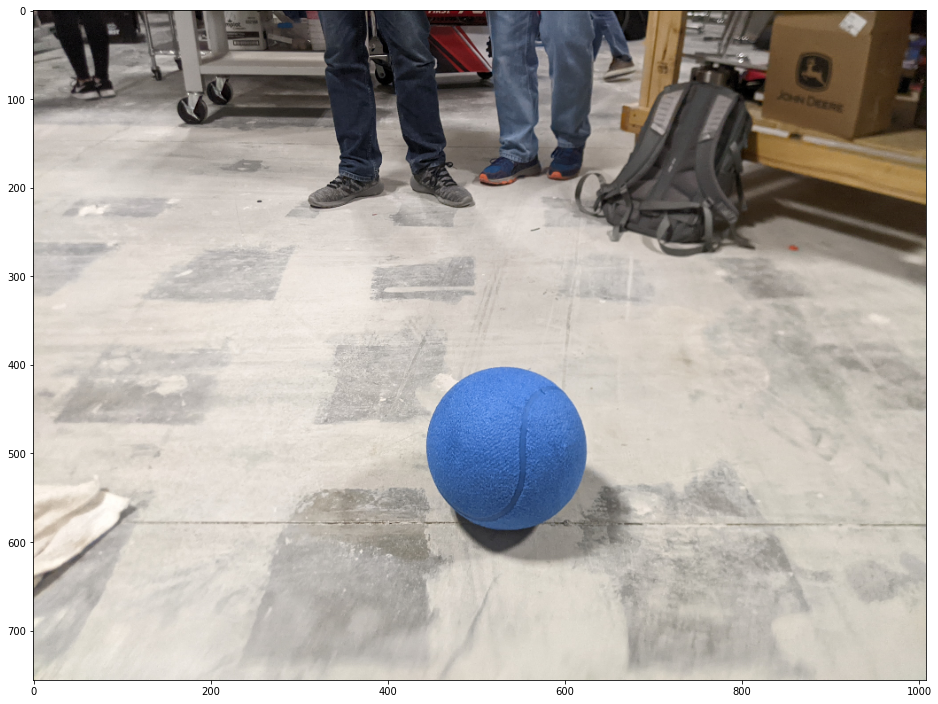

In [31]:
img = cv2.imread('data/PXL_20220111_235304810.jpg')
h, w, _ = img.shape
img = cv2.resize(img, (w//4, h//4))
show(img)

In [32]:
dnn = cv2.dnn_DetectionModel('yolo/yolov4-tiny.weights', 'yolo/yolov4-tiny.cfg')

In [33]:
dnn.setInputSize(416, 416)
dnn.setInputSwapRB(True)
dnn.setNmsAcrossClasses(True)
dnn.setInputScale(1/255.0)
tstart = time.time()
classids, conf, boxes = dnn.detect(img, 0.8, 0.4)
tstop = time.time()
print(f'Inference took {tstop - tstart:01.3} seconds and found {len(conf)} objects')

Inference took 0.0468 seconds and found 4 objects


In [34]:
indices = []
nms_indices = cv2.dnn.NMSBoxes(boxes, conf, 0.5, 0.4)
nms_indices



array([0, 1, 2, 3], dtype=int32)

In [35]:
def drawPred(img, classId, conf, left, top, right, bottom):
    # Draw a bounding box.
    cv2.rectangle(img, (left, top), (right, bottom), (0, 255, 0))

    label = f'{conf}'

    # Print a label of class.
    if class_names:
        assert(classId < len(class_names))
        conf = round(conf, 2)
        label = f'{class_names[classId]}: {conf:01.4}'

    labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    top = max(top, labelSize[1])
    cv2.rectangle(img, (left, top - labelSize[1]), (left + labelSize[0], top + baseLine), (255, 255, 255), cv2.FILLED)
    cv2.putText(img, label, (left, top), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
    return img

In [36]:
drawimg = img.copy()
for i in range(len(conf)):
    box = boxes[i]
    left = box[0]
    top = box[1]
    width = box[2]
    height = box[3]
    print(f'{box} class: {class_names[classids[i]]} conf: {conf[i]:01.4}')
    drawimg = drawPred(drawimg, classids[i], conf[i], left, top, left + width, top + height)

[512   0 160 213] class: person conf: 0.896
[ 5  0 93 96] class: person conf: 0.8671
[630  77 179 205] class: backpack conf: 0.833
[311   0 197 216] class: person conf: 0.8111


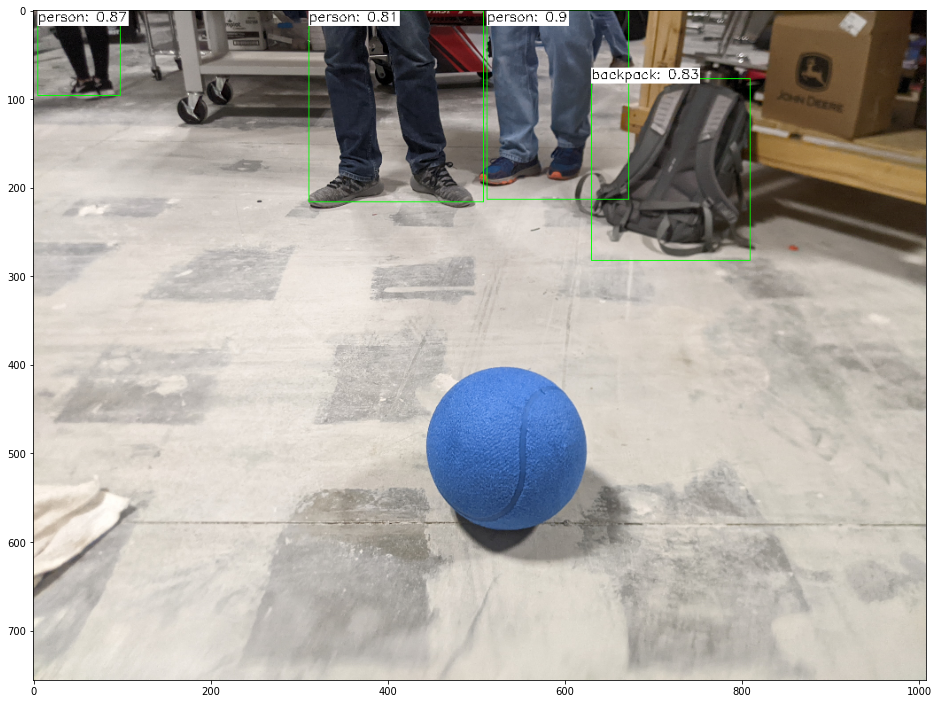

In [37]:
show(drawimg)